# Cryptocurrency Clusters Homework

In [1]:
# Initial imports
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.cluster import DBSCAN
import numpy as np

In [2]:
#Data Preparation
file_path = Path("crypto_data.csv")
df_crypto_raw = pd.read_csv(file_path)
df_crypto_raw.head(5)


,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [3]:
#Data Preparation:
#Discard all cryptocurrencies that are not being traded. 
#Filter for cryptocurrencies that have been mined(total coins mined should be greater than zero).
df_crypto_cln = df_crypto_raw.loc[(df_crypto_raw.IsTrading == True) & (df_crypto_raw.TotalCoinsMined > 0)]

#Making data numeric - deleting columns'CoinName', 'Unnamed: 0' and 'IsTrading'(since data has been filtered and all values are true) from the original dataframe.
#Removing all rows that have at least one null value.

drop_columns = ["CoinName","Unnamed: 0","IsTrading"]
df = df_crypto_cln.drop(columns=drop_columns).dropna()

#coverting "TotalCoinSupply" column data from object to float
df_clean = df.astype({"TotalCoinSupply": 'float'})
df_clean.reset_index(drop=True, inplace=True)
df_clean


,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,4.200000e+01
1,Scrypt,PoW/PoS,1.055185e+09,5.320000e+08
2,X13,PoW/PoS,2.927942e+10,3.141593e+11
3,SHA-256,PoW,1.792718e+07,2.100000e+07
4,Ethash,PoW,1.076842e+08,0.000000e+00
...,...,...,...,...
527,SHA-256,DPoS,2.000000e+09,2.000000e+09
528,Scrypt,PoW/PoS,1.493105e+07,2.500000e+08
529,CryptoNight,PoW,9.802226e+08,1.400223e+09
530,Equihash,PoW,7.296538e+06,2.100000e+07


In [4]:
#Standardize your dataset so that columns that contain larger values do not unduly influence the outcome.
#scaling numerical data only
df_tobescaled = df_clean[["TotalCoinSupply", "TotalCoinsMined"]]
scaler = StandardScaler().fit(df_tobescaled)
data_scaled = scaler.transform(df_tobescaled)
data_scaled


array([[-0.1528703 , -0.11710817],
       [-0.145009  , -0.09396955],
       [ 4.48942416,  0.52494561],
       ...,
       [-0.13217937, -0.09561336],
       [-0.15255998, -0.11694817],
       [-0.15285552, -0.11710536]])

In [5]:
data_df_scaled = pd.DataFrame(data_scaled, columns = df_tobescaled.columns)
#combining scaled numerical data with categorical data and changing categorical data to numerical data (get_dummies)
data_df_conc = pd.concat([data_df_scaled, df_clean[["Algorithm","ProofType"]]], axis=1)
data_ready = pd.get_dummies(data_df_conc)
data_ready



,TotalCoinSupply,TotalCoinsMined,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,-0.152870,-0.117108,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,-0.145009,-0.093970,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,4.489424,0.524946,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,-0.152560,-0.116715,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.152870,-0.114747,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,-0.123317,-0.073251,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
528,-0.149176,-0.116781,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
529,-0.132179,-0.095613,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
530,-0.152560,-0.116948,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
#set(labels)
#unique, counts = np.unique(labels, return_counts=True)
#result = np.column_stack((unique, counts)) 
#print (result)



Perform dimensionality reduction with PCA. 


In [7]:
# Initialize PCA model for dimensionality reduction of the 98 features
pca = PCA(n_components=0.90)
data_pca = pca.fit_transform(data_ready)
data_pca.shape


(532, 12)

In [8]:
#Features changed from 98 t0 12 while maintaining 90% of the explained variance
pvr = pca.explained_variance_ratio_
print (pvr)
#Note that the 1st feature (total coin supply account for 49% of the explained variance)


[0.48571172 0.11208538 0.08451798 0.072829   0.05750016 0.03175391
 0.01970541 0.00968977 0.00891169 0.00821675 0.00768671 0.00628043]


Further reduce the dataset dimensions with t-SNE and visually inspect the results. 

In [9]:
tsne = TSNE(learning_rate=100)
tsne_data = tsne.fit_transform(data_pca)
tsne_data.shape


/Users/ramon/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


(532, 2)

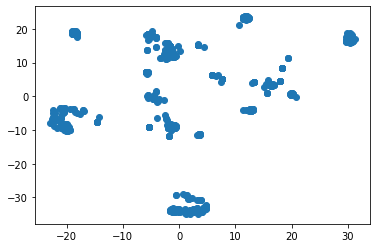

In [10]:
#plotting the results of t-SNE
plt.scatter(tsne_data[:,0], tsne_data[:,1])
plt.show()


In [11]:
#Analysis of t-SNE - the two dimensional graph shows several distint clusters (~7-9)

Cluster Analysis with k-Means

In [12]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(data_ready)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow


,k,inertia
0,1,1869.804511
1,2,1185.563729
2,3,972.531253
3,4,779.751968
4,5,665.991021
5,6,570.774322
6,7,515.241330
7,8,465.065712
8,9,439.844187
9,10,410.497047


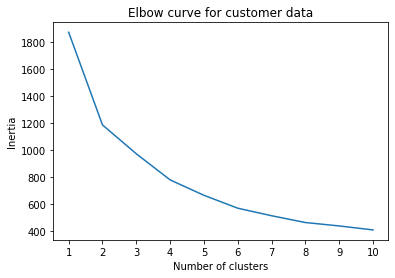

In [13]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for customer data')
plt.show()


In [14]:
#K-Means analysis: the graph confirms the t-SNE diagram showing a decrese inertia rate around 8 clusters.

#### Analysis/Recommendation: According to the analysis, the initial 1,200 crypto currencies were filtered to 532 entries; each representing a specific crypto currency. The clustering analysis shows that the data can be clustered into 8 different clusters. Some clusters are more defined than others, but overall I would recommend grouping them together. Additional analysis would be benefitial, including remoiving outliers. Below is an initial analysis to identify the different clusters. 

**Additional analysis**
Using a function called 'get_clusters(k, data)', we are finding clusters using K-Means on data. The function returns a DataFrame copy of Data with a new column containing the clusters found.

In [15]:
def get_clusters(k, data):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=42)
    # Train the model
    model.fit(data)
    # Predict clusters
    predictions = model.predict(data)
    # Create return DataFrame with predicted clusters
    data["class"] = model.labels_
    return data


In [16]:
clusters = get_clusters(8, data_ready)
labels = clusters["class"]


In [17]:
unique, counts = np.unique(labels, return_counts=True)
result = np.column_stack((unique, counts)) 
print (result)
#identifying the number of data points on each cluster

[[  0  87]
 [  1   1]
 [  2  75]
 [  3   1]
 [  4  81]
 [  5  10]
 [  6 173]
 [  7 104]]


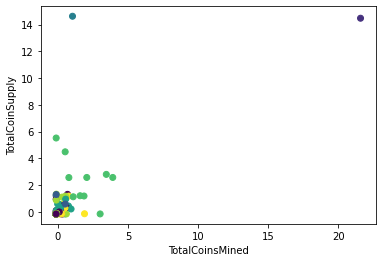

In [18]:
def show_clusters(df):
    plt.scatter(df["TotalCoinsMined"], df["TotalCoinSupply"], c = df["class"])
    plt.xlabel('TotalCoinsMined')
    plt.ylabel('TotalCoinSupply')
    plt.show()

show_clusters(clusters)

In [19]:
# The previous information shows a couple of outliers that causes the model to consider them clusters.